In [ ]:
经验总结
1. 模型可以用来大概预测牛市初期，因为在熊市中predict=1的数量非常少，按月分布查看下图，熊市大部分时间数量小于10个

In [1]:
import lightgbm
import json
import pandas as pd
import numpy as np
from datetime import datetime, timedelta


model_file='fallback_new_hight_gbdt_model.txt'
buy_point_predict_model = lightgbm.Booster(model_file=model_file)

features = buy_point_predict_model.feature_name()


# 测试熟悉的股票预测情况
df =  pd.read_csv("./fallback_new_high_2000_2018-12-16.tsv", sep="\t")

now = datetime.now()
half_year = now - timedelta(days=400)
strx =  half_year.strftime("%Y-%m-%d")
print(strx)
# df = df[df["end_date"] > strx]

print(df.shape)

X = df[features]
y = df["target"]

y_predict = buy_point_predict_model.predict(X)

df['predict'] = y_predict

z = df[["code", "start_date", "end_date", "gain","target", "predict"]]
z = z[(z["predict"] > 0.5649)]


/anaconda3/lib/python3.6/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.1) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


2017-11-14
(35285, 32)


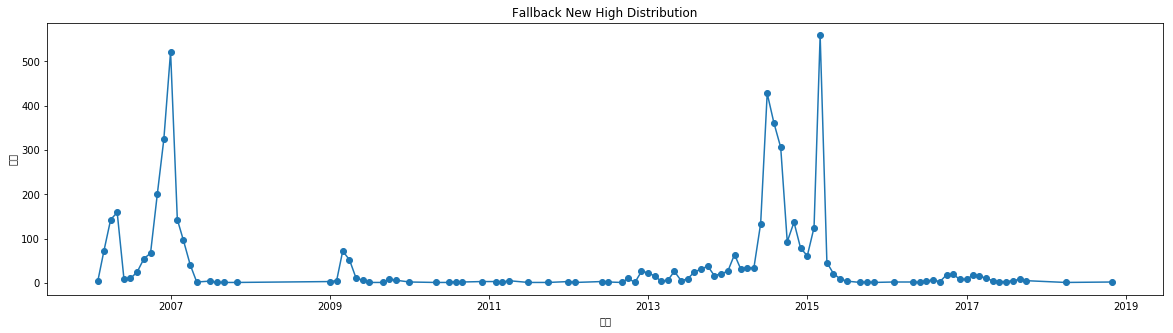

In [2]:
import matplotlib.pyplot as plt
z = z.sort_values(by="end_date",ascending= False)
dates = z["end_date"]
points = {}
for d in dates:
    s = d[:7]    
    points[s] = (1 if s not in points else points[s]+1)

x_axis = [datetime.strptime(d, '%Y-%m').date() for d in points]
y_axis = [points[d] for d in points]
# print(y_axis)
# pl.ylim(2007, 110)
plt.figure(1, figsize=(20, 5))
plt.title('Fallback New High Distribution')
plt.plot(x_axis, y_axis, 'o-')
plt.xlabel('日期')
plt.ylabel('次数')
plt.show()



In [3]:
df = pd.DataFrame.from_dict(points, orient='index')
df

,0
2018-11,2
2018-04,1
2017-10,5
2017-09,8
2017-08,5
2017-07,3
2017-06,3
2017-05,5
2017-04,10
2017-03,16
